In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import pickle
sns.set_theme()

In [3]:
df_purchase = pd.read_csv('../Datasets/purchase data.csv')

In [85]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
scaler = pickle.load(open('../Pickle Files/scaler.pkl', 'rb'))
pca = pickle.load(open('../Pickle Files/pca.pkl', 'rb'))
kmeans_pca = pickle.load(open('../Pickle Files/kmeans_pca.pkl', 'rb'))

In [87]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

In [88]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

In [89]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [90]:
df_purchase_predictors = df_purchase.copy()

In [91]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

In [92]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [93]:
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence':'N_Visits'})

In [94]:
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [95]:
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence':'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [96]:
temp3['Average N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [97]:
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
df_purchase_desc = temp3.join(temp4)

In [98]:
df_purchase_desc.head()

,N_Visits,N_Purchases,Average N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0.0
200000002,87,11,0.126437,3.0
200000003,97,10,0.103093,0.0
200000004,85,11,0.129412,1.0
200000005,111,13,0.117117,0.0


In [99]:
segm_prop = df_purchase_desc[['N_Purchases', 'Segment']].groupby(['Segment']).count()/df_purchase_desc.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases':'Segment Proportions'})

In [100]:
segm_prop.head()

,Segment Proportions
Segment,
0.0,0.290
1.0,0.362
2.0,0.152
3.0,0.196


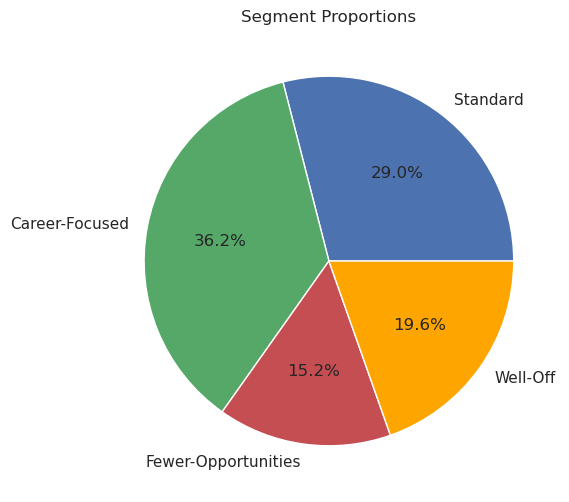

In [101]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%',
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')
plt.show()

In [102]:
segments_mean = df_purchase_desc.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average N_Purchases
Segment,,,
0.0,120.489655,34.965517,0.258081
1.0,114.303867,22.823204,0.201760
2.0,118.828947,27.171053,0.228956
3.0,117.367347,34.408163,0.282601


In [103]:
segments_std = df_purchase_desc.groupby(['Segment']).std()
segments_std

,N_Visits,N_Purchases,Average N_Purchases
Segment,,,
0.0,39.398448,47.564198,0.181261
1.0,17.762052,13.851663,0.120124
2.0,19.834239,19.495222,0.146761
3.0,20.840775,25.997160,0.172682


Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

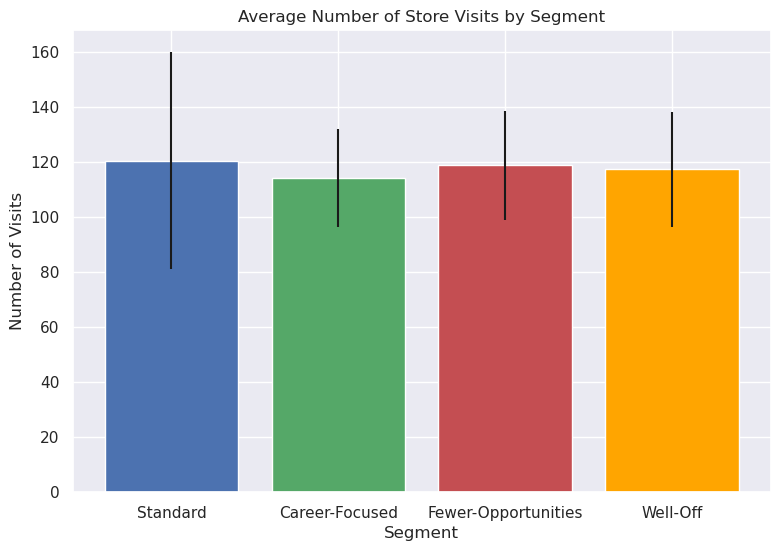

In [104]:
plt.figure(figsize=(9,6))
plt.bar(x = (0,1,2,3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Number of Purchases by Segment')

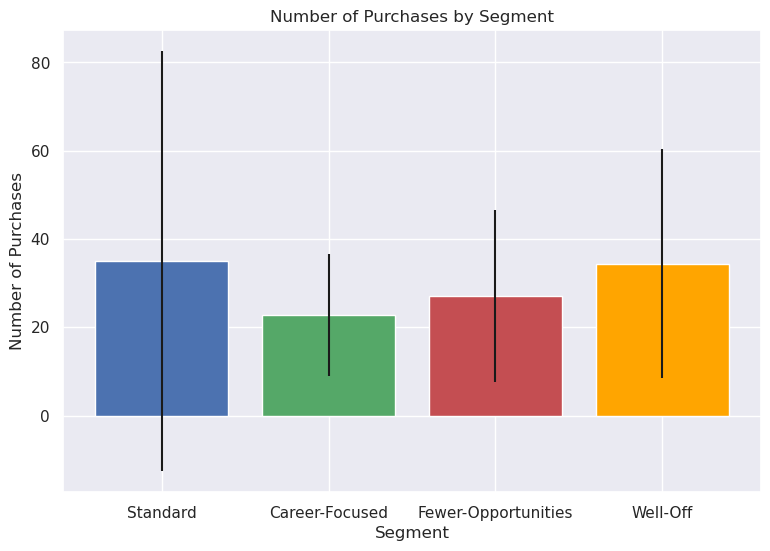

In [105]:
plt.figure(figsize=(9,6))
plt.bar(x = (0,1,2,3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'),
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Segment')

In [106]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] > 0]

In [107]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix='Brand', prefix_sep='_')

In [108]:
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']

In [109]:
brand_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,False,True,False,False,False,0,200000001
11,False,False,False,False,True,0,200000001
19,True,False,False,False,False,0,200000001
24,False,False,False,True,False,0,200000001
29,False,True,False,False,False,0,200000001


In [110]:
temp = brand_dummies.groupby(['ID']).mean()
temp.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.0,0.222222,0.222222,0.0
200000002,0.000000,0.090909,0.0,0.909091,0.000000,3.0
200000003,0.000000,0.800000,0.0,0.000000,0.200000,0.0
200000004,0.000000,0.090909,0.0,0.000000,0.909091,1.0
200000005,0.000000,0.000000,0.0,0.000000,1.000000,0.0


In [111]:
mean_brand_choice = temp.groupby(['Segment']).mean()

In [112]:
mean_brand_choice.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0.0,0.079019,0.329006,0.029233,0.093493,0.469248
1.0,0.167302,0.597683,0.061925,0.069068,0.104022
2.0,0.232219,0.373984,0.119907,0.077677,0.196212
3.0,0.047030,0.131953,0.029682,0.594854,0.196479


Text(0.5, 1.0, 'Mean Brand Choice')

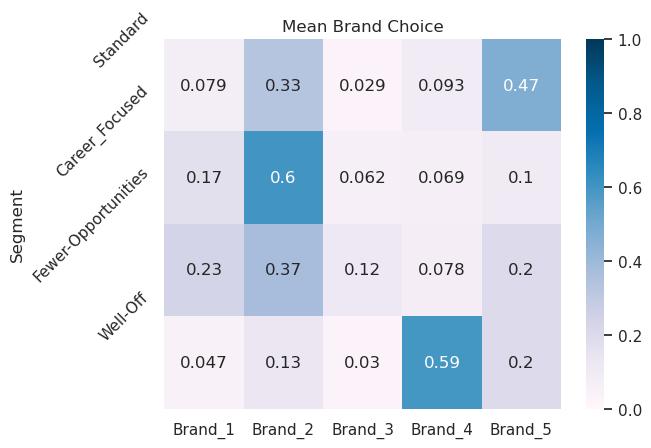

In [113]:
sns.heatmap(mean_brand_choice,
            vmin=0,
            vmax=1,
            cmap='PuBu',
            annot=True)
plt.yticks([0,1,2,3], ['Standard', 'Career_Focused', 'Fewer-Opportunities', 'Well-Off'], rotation=45)
plt.title('Mean Brand Choice')

In [114]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1].copy()
temp['Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp.groupby('Segment', as_index=False)['Revenue Brand 1'].sum()
segments_brand_revenue.head()

,Segment,Revenue Brand 1
0,0,912.12
1,1,2807.51
2,2,1869.77
3,3,716.25


In [115]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2].copy()
temp['Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
temp2 = temp.groupby('Segment', as_index=False)['Revenue Brand 2'].sum()
segments_brand_revenue = pd.merge(segments_brand_revenue, temp2, on='Segment', how='outer')
segments_brand_revenue.head()

,Segment,Revenue Brand 1,Revenue Brand 2
0,0,912.12,5222.99
1,1,2807.51,11742.86
2,2,1869.77,3382.47
3,3,716.25,1419.99


In [116]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3].copy()
temp['Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
temp2 = temp.groupby('Segment', as_index=False)['Revenue Brand 3'].sum()
segments_brand_revenue = pd.merge(segments_brand_revenue, temp2, on='Segment', how='outer')
segments_brand_revenue.head()

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,912.12,5222.99,603.79
1,1,2807.51,11742.86,2388.88
2,2,1869.77,3382.47,2303.31
3,3,716.25,1419.99,725.54


In [117]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4].copy()
temp['Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
temp2 = temp.groupby('Segment', as_index=False)['Revenue Brand 4'].sum()
segments_brand_revenue = pd.merge(segments_brand_revenue, temp2, on='Segment', how='outer')
segments_brand_revenue.head()

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,912.12,5222.99,603.79,2268.95
1,1,2807.51,11742.86,2388.88,1910.89
2,2,1869.77,3382.47,2303.31,1165.16
3,3,716.25,1419.99,725.54,13695.10


In [118]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5].copy()
temp['Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
temp2 = temp.groupby('Segment', as_index=False)['Revenue Brand 5'].sum()
segments_brand_revenue = pd.merge(segments_brand_revenue, temp2, on='Segment', how='outer')
segments_brand_revenue.head()

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,912.12,5222.99,603.79,2268.95,17838.72
1,1,2807.51,11742.86,2388.88,1910.89,2638.52
2,2,1869.77,3382.47,2303.31,1165.16,3638.75
3,3,716.25,1419.99,725.54,13695.10,5505.01


In [119]:
segments_brand_revenue['Total Revenue'] = (
    segments_brand_revenue['Revenue Brand 1'] +
    segments_brand_revenue['Revenue Brand 2'] +
    segments_brand_revenue['Revenue Brand 3'] +
    segments_brand_revenue['Revenue Brand 4'] +
    segments_brand_revenue['Revenue Brand 5']
)

In [120]:
segments_brand_revenue.head()

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,912.12,5222.99,603.79,2268.95,17838.72,26846.57
1,1,2807.51,11742.86,2388.88,1910.89,2638.52,21488.66
2,2,1869.77,3382.47,2303.31,1165.16,3638.75,12359.46
3,3,716.25,1419.99,725.54,13695.10,5505.01,22061.89


In [121]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Standard',
                                                                           1:'Career-Focused',
                                                                           2:'Fewer-Opportunities',
                                                                           3:'Well-Off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue.head()

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,912.12,5222.99,603.79,2268.95,17838.72,26846.57,0.290
Career-Focused,2807.51,11742.86,2388.88,1910.89,2638.52,21488.66,0.362
Fewer-Opportunities,1869.77,3382.47,2303.31,1165.16,3638.75,12359.46,0.152
Well-Off,716.25,1419.99,725.54,13695.10,5505.01,22061.89,0.196
